In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
#scikit-learn includes various random sample generators that can be used to build
#artificial datasets of controlled size and complexity

C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 19

make_blobs create multiclass datasets by allocating each class one or more normally-distributed clusters of points.
make_blobs provides greater control regarding the centers and standard deviations of each cluster,and is used to demonstrate clustering.

In [17]:
help(make_blobs)

Help on function make_blobs in module sklearn.datasets.samples_generator:

make_blobs(n_samples=100, n_features=2, centers=None, cluster_std=1.0, center_box=(-10.0, 10.0), shuffle=True, random_state=None)
    Generate isotropic Gaussian blobs for clustering.
    
    Read more in the :ref:`User Guide <sample_generators>`.
    
    Parameters
    ----------
    n_samples : int or array-like, optional (default=100)
        If int, it is the total number of points equally divided among
        clusters.
        If array-like, each element of the sequence indicates
        the number of samples per cluster.
    
    n_features : int, optional (default=2)
        The number of features for each sample.
    
    centers : int or array of shape [n_centers, n_features], optional
        (default=None)
        The number of centers to generate, or the fixed center locations.
        If n_samples is an int and centers is None, 3 centers are generated.
        If n_samples is array-like, centers 

In [25]:
X, y = make_blobs(n_samples=10, centers=None, n_features=2,random_state=0)

In [26]:
y

array([0, 0, 1, 0, 2, 2, 2, 1, 1, 0])

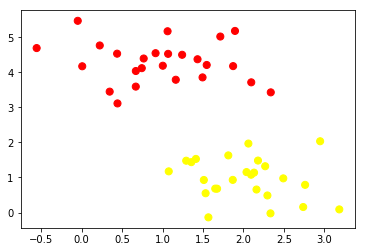

In [34]:
X,y = make_blobs(n_samples = 50,centers = 2,random_state = 0,
                 cluster_std = 0.60)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap = 'autumn')

#s : scalar or array_like shape(n,),optional
#The marker size in points **2.
#c : color,sequence,or sequence of color,optional
#size matching both x and y.
#A 2D array in which the rows are RGB or RGBA

A linear discriminative classifier would attempt to draw a straight line separating the two sets of dataand therby create a model for classification.

xfit = np.linspace(-1,3.5)
plt.scatter(X[:,0],X[:,1],c = y,s = 50,cmap = 'autumn')
plt.plot([0.6],[2.1],'x',color = 'r',markeredgewidth = 2,markersize = 10)
for m,b in [(1,0.6),(0.5,1.6),(-0.2,2.9)]:
    plt.plot(xfit,m*xfit+b,'k')
plt.xlim(-1,3.5)

These are three very different separators which,nevertheless perfectly discriminate between these samples.Depending on which you choose, a new data point(e.g.,the one marked as 'x' in this plot)will be assigned a different label.Evidently our simple intuition of "drawing a line between classes".

#Maximizing the margin support vector machines offer one way to improve on this.The intuition is to rather than simply drawing a zero-width line between the classes,we can draw around each line a margin of width,up to the nearest point.Here is an example of it.

(-1, 3.5)

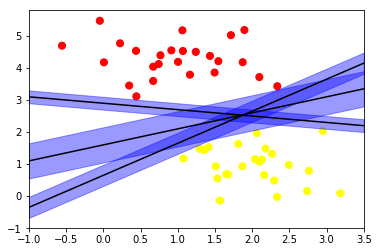

In [38]:
xfit = np.linspace(-1,3.5)
plt.scatter(X[:,0],X[:,1],c = y,s = 50,cmap = 'autumn')

for m,b,d in [(1,0.65,0.33),(0.5,1.6,0.55),(-0.2,2.9,0.2)]:
    yfit= m*xfit + b
    plt.plot(xfit,yfit,'k')
    plt.fill_between(xfit,yfit-d,yfit+d,color ='b',alpha = 0.4)
plt.xlim(-1,3.5)
#Fill the area in between two hoarizontal curves
#this creates one or multiple polygons describing the filling area

Let's see the result of an actual fit to this data:we will use Scikit-learn's Support Vector Classifier to train an SVM model on this data.We will use linear kernel and set the C parameter to default value.

In [41]:
from sklearn.svm import SVC
model = SVC(kernel = 'linear',C = 1)
model.fit(X,y)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [42]:
#plot the decision function
def plot_svc_decision_function(model,ax=None,plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
#gca means ge current get current axis
#current here means it provides a handle to the last active axes.
    #create grid to evalute the model
    x = np.linspace(xlim[0],xlim[1],30)
    y = np.linspace(ylim[0],ylim[1],30)
    Y,X = np.meshgrid(y,x)
    xy = np.vstack([X.ravel(),Y.ravel()]).T
    P= model.decision_function(xy).reshape(X.shape)
    
    #plot the decision boundary and margins
    ax.contour(X,Y,P,colors = 'k',levels = [-1,0,1],alpha = 0.5,
               linestyles = ['--','-','--'])
    
    #plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:,0],
                  model.support_vectors_[:,1],
                  s = 300,linewidth = 5,facecolors = None)
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

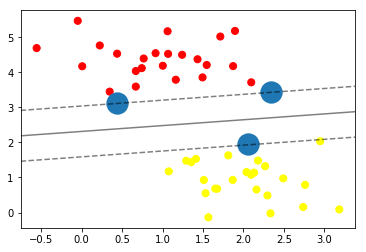

In [43]:
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='autumn')
plot_svc_decision_function(model);

Two datasets are included,realted to red and white Vinho verder wine samples,from north of Portugal.The goal is to model wine quality based on physiochemical tests

#fixed acidity :most acids involved with wine or fixed or nonvolatile (do not evaporate readily)

#volatile acidity: the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste

#citric acid:found in small quantities, citric acid can add 'freshness' and flavor to wines

#residual sugar: the amount of sugar remaining after fermentation stops, it's rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet

#chlorides:the amount of salt in the wine

#free sulfur dioxide:the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine

#total sulfur dioxide:amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine

#density: the density of water is close to that of water depending on the percent alcohol and sugar content

#pH:describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale

#sulphates: a wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial and antioxidant

#alcohol:the percent alcohol content of the wine

#quality: output variable (based on sensory data, score between 0 and 10)

In [44]:
import pandas as pd
import seaborn as sns

C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [45]:
d = pd.read_csv("winequality.csv")
d.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [46]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [47]:
d.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

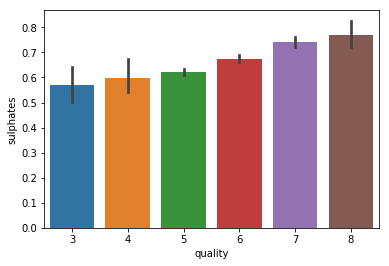

In [48]:
#quality vs sulphates
sns.barplot(x='quality',y='sulphates',data=d)

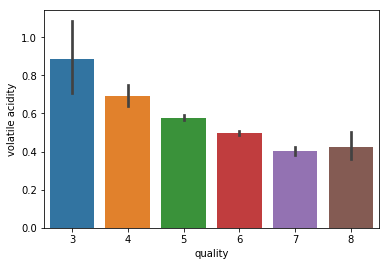

In [49]:
#quality vs volatile acidity
sns.barplot(x='quality',y='volatile acidity',data=d)

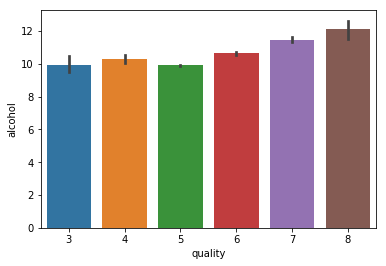

In [50]:
#quality vs alcohol
sns.barplot(x='quality',y='alcohol',data=d)

In [51]:
#showing the counts before categorize the quality column
d['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [52]:
#categorize win quality
bins =(2,6.5,8)
group_names = ['bad','good']
categories = pd.cut(d['quality'],bins,labels = group_names)
#Bin values into discrete intervals
#Use cut function to segment and sort the data values into bins
#Useful for going from a continuous variable to a categorical variable
d['quality'] =categories

In [53]:
#after categorize
d['quality'].value_counts()

bad     1382
good     217
Name: quality, dtype: int64

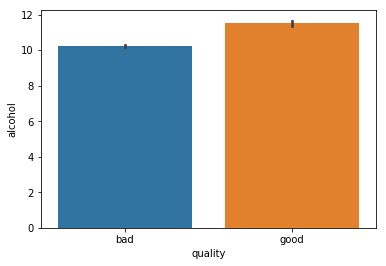

In [54]:
#quality vs alcohol
#more alcohol better red wine
sns.barplot(x = 'quality',y='alcohol',data = d)

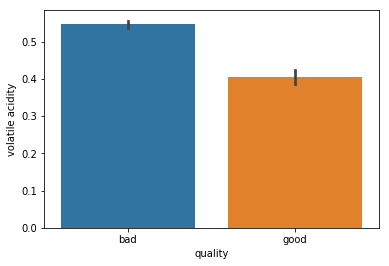

In [55]:
#quality vs volatile acidity
#less volatile,better red wine
sns.barplot(x='quality',y='volatile acidity',data=d)

In [59]:
#splitting data to X and y
X = d.drop(['quality'],axis = 1)
y = d['quality']

In [60]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.99640,3.30,0.46,9.4
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.0
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.99680,3.36,0.57,9.5
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5


In [61]:
#Encoding or dependent variable:quality column
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
y = labelencoder.fit_transform(y)

In [62]:
y

array([0, 0, 0, ..., 0, 0, 0])

In [63]:
#Splitting the dataset into training set and testing set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.2,
                                                 random_state=0)

In [64]:
#feature scaling to X_train and X_test to classify better
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train=sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [65]:
#Fitting kernel svm to the training set
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix
classifier = SVC(kernel = 'rbf',random_state = 0)
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
accuracy_score(y_pred,y_test)

0.91875

In [66]:
#kfold cross validation for improving the model
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier,X=X_train,
                            y=y_train,cv = 100)
#cv int cross-validation generator or an iterable,optional
#Determines the cross-validation splitting strategy
#None,to use default -5-fold cross validation
#CV splitter,
#An iterable yielding (train, test) splits as arrays of indices.
#we can see model's average accuracy
accuracies.mean()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarni

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarni

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarni

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarni

0.8770221445221443

In [67]:
#GridSearch for best model and parameters
#Exhaustive search over specified parameter values for an estimator
#Important members are fit and predict
from sklearn.model_selection import GridSearchCV
parameters = [{'C':[1,10,100,1000],'kernel':['linear']},
             {'C':[1,10,100,1000],'kernel':['rbf'],
             'gamma':[0.1,0.2,0.4,0.5,0.6,0.7,0.8,0.9]}]
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10)
grid_search.fit(X_train,y_train)
best_accuracy=grid_search.best_score_
best_parameters = grid_search.best_params_

In [68]:
best_parameters

{'C': 1, 'gamma': 0.9, 'kernel': 'rbf'}

In [69]:
best_accuracy

0.893666927286943

In [70]:
# Fitting Kernel SVM to the Training set with best parameters
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0, gamma = 0.9)
classifier.fit(X_train, y_train)

#Predicting the Test Set
y_pred = classifier.predict(X_test)
accuracy_score(y_pred,y_test)

0.934375